# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [1]:
from string import ascii_uppercase as letters

S = letters[::-1] + letters[1 : ]
#S = ZYXW.......DCBABCD.......WXYZ

def F(n):
    #running the loop n times for n lines
    for i in range(n):

        #hypens for the outer part
        msg1 = '-' * (n - i -1)

        #slicing S to get the middle part
        msg2 = S[26 - i - 1 : 26 + i]

        print(f"{msg1}{msg2}{msg1}")
        #used fstrings since it is more efficient than concatenating

    print('\n')#a line space after running the function

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ


-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF




## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [2]:
def F(d: dict):
    #using python's built-in sorted funtion
    print("Sorted by key ascending :")
    for key, value in sorted(d.items()):
        print(f"{key}, {value[0]}, {value[1]}")

    print("\nSorted by x descending :")
    for key, value in sorted(d.items(), key=lambda item: item[1][0], reverse=True):
        print(f"{key}, {value[0]}, {value[1]}")

    print("\nSorted by y ascending :")
    for key, value in sorted(d.items(), key=lambda item: item[1][1]):
        print(f"{key}, {value[0]}, {value[1]}")
    print('\n')

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by key ascending :
1, 1, 2
2, -1, 4
4, 2, 3
5, -4, 3

Sorted by x descending :
4, 2, 3
1, 1, 2
2, -1, 4
5, -4, 3

Sorted by y ascending :
1, 1, 2
5, -4, 3
4, 2, 3
2, -1, 4


Sorted by key ascending :
-8, 4, 2
5, 9, -10
6, -3, 4
7, 2, 1

Sorted by x descending :
5, 9, -10
-8, 4, 2
7, 2, 1
6, -3, 4

Sorted by y ascending :
5, 9, -10
7, 2, 1
-8, 4, 2
6, -3, 4




## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [3]:
try:
    with open('student_records.csv', 'r') as f:
        for i in range(10 + 1):
            print(f.readline().strip())

except FileNotFoundError:
    print("Error : student_records.csv not found.")


roll_number,department,credit,course_name,course_type,grade
588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA
310604,EE,8,EE202,core,AB


In [4]:
###creating a data structure of dictionaries inside a list to use it in 2b, 2c, 2d, 2e

student_data = []
grade_map = {"AA": 10, "AP": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}

try:
    with open('student_records.csv', 'r') as f:
        header = f.readline().strip().split(',')

        for line in f:
            row_data = line.strip().split(',')
            student_data.append(dict(zip(header, row_data)))

except FileNotFoundError:
    print("Error : student_records.csv not found.")


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [5]:
student_cpi = {}
#since we created a data structure we can easily access, and compute CPI
if student_data:
    for student_record in student_data:
        roll_number = student_record['roll_number']
        course_type = student_record['course_type']
        credit = int(student_record['credit'])
        grade = student_record['grade']

        if roll_number not in student_cpi:
            student_cpi[roll_number] = {"total_credits": 0, "weighted_grade_points": 0}

        if course_type in ["core", "department_elective", "flexible_elective"]:
            student_cpi[roll_number]["total_credits"] += credit
            student_cpi[roll_number]["weighted_grade_points"] += credit * grade_map.get(grade, 0)

    for roll_number, data in student_cpi.items():
        total_credits = data["total_credits"]
        weighted_grade_points = data["weighted_grade_points"]
        cpi = weighted_grade_points / total_credits if total_credits > 0 else 0.0
        print(f"Roll Number : {roll_number}, Total Credits : {total_credits}, CPI : {cpi:.2f}")

elif not student_data:
    print("Error loading the file")

Roll Number : 588946, Total Credits : 89, CPI : 8.56
Roll Number : 145372, Total Credits : 59, CPI : 7.66
Roll Number : 834515, Total Credits : 118, CPI : 8.26
Roll Number : 344265, Total Credits : 49, CPI : 8.33
Roll Number : 358405, Total Credits : 76, CPI : 8.14
Roll Number : 781075, Total Credits : 132, CPI : 8.32
Roll Number : 180828, Total Credits : 91, CPI : 8.19
Roll Number : 981238, Total Credits : 91, CPI : 8.32
Roll Number : 836881, Total Credits : 72, CPI : 7.46
Roll Number : 310604, Total Credits : 93, CPI : 8.23
Roll Number : 847809, Total Credits : 55, CPI : 8.27
Roll Number : 773982, Total Credits : 117, CPI : 7.91
Roll Number : 500658, Total Credits : 85, CPI : 8.44
Roll Number : 810863, Total Credits : 102, CPI : 8.18
Roll Number : 124663, Total Credits : 94, CPI : 8.12
Roll Number : 364146, Total Credits : 62, CPI : 8.77
Roll Number : 871746, Total Credits : 80, CPI : 7.69
Roll Number : 270007, Total Credits : 93, CPI : 7.37
Roll Number : 597353, Total Credits : 56, 

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [6]:
graduating_students = []

if student_data:
    for student_record in student_data:
        roll_number = student_record['roll_number']
        
        #since we created a data structure we can easily access, and filter data
        core_credits = sum(int(record['credit']) for record in student_data if record['roll_number'] == roll_number and record['course_type'] == 'core')
        dept_elective_credits = sum(int(record['credit']) for record in student_data if record['roll_number'] == roll_number and record['course_type'] == 'department_elective')
        flex_elective_credits = sum(int(record['credit']) for record in student_data if record['roll_number'] == roll_number and record['course_type'] == 'flexible_elective')
        hasmed_elective_credits = sum(int(record['credit']) for record in student_data if record['roll_number'] == roll_number and record['course_type'] == 'hasmed_elective')


        if (core_credits >= 20 and dept_elective_credits >= 15 and
                flex_elective_credits >= 10 and hasmed_elective_credits >= 5):
            graduating_students.append(roll_number)

    print("\nGraduating Students :")
    for roll in graduating_students:
        print(roll)
    
elif not student_data:
    print("Error loading the file")


Graduating Students :
588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
781075
986057
871746
379479
124663
144528
485484
845623
836881
150503
214270
517837
517837
482623
721490
214270
955757
721490
845623
143856
150503
836881
571782
973158
214270
124663
703403
960395
521087
461971
517837
955757
781075
781075
879634
703403
716985
265922
283796
981238
517837
721490
203200
482623
588946
986057
180828
716985
327122
973158
781075
703403
534763
214270
391848
180828
571782
781075
180828
971123
482623
207443
488661
810863
810863
782129
928288
143856
581858
716985
282482
572815
608952
517837
773982
628849
845623
630568
845623
716985
388969
159438
973158
981238
960395
581858
981238
781075
488661
124663
282482
572815
970791
124663
143142
970791
282482
998293
214270
144528
482623
379479
681499
628849
888886
608522
144528
203200
362471
571782
482623
571782
608952
150503
143856
327122
143856
981238
971123
973158
981238
973158
692318
282482
571782
388969
124663
7739

#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [7]:
minor_completed_students = []

if student_data:
    student_minors = {} #using a dictionary so that we can group minor credits by department and student
    for student_record in student_data:
        roll_number = student_record['roll_number']
        course_type = student_record['course_type']
        credit = int(student_record['credit'])
        department = student_record['department']


        if course_type == "minor":
            if roll_number not in student_minors:
                student_minors[roll_number] = {}
            student_minors[roll_number][department] = student_minors[roll_number].get(department, 0) + credit

    for roll_number, minors in student_minors.items():
        #checking whether a student has completed a minor or not
        if any(credits >= 10 for credits in minors.values()):
            minor_completed_students.append(roll_number)


    print("\nStudents who completed a minor :")
    for roll in minor_completed_students:
        print(roll)

elif not student_data:
    print("Error loading the file")


Students who completed a minor :
358405
180828
981238
847809
270007
781075
986057
124663
364146
517837
721490
150503
571782
716985
194063
265922
482623
329535
207443
810863
973158
143142
970791
907454
888886
608522
608952
143856
773982
960395
283796
461584
879634
597353
845623
465496
718510
534763
680096
836881
787967
344265
581858
391848
485484
775967
138296
381526
681499
816041
971123
199713
630568
379479
362471
703403
388969
836431
582912
381227
478606
159438
733782
782129
144528
851029
881983
458200
998293
628849
995208
613401
301135
500658
488661
788020
626000
955757
841365
750259
572815
521087
214270
461971
692318
145372
588946
834515
208100
871746
327122
581065
203200
294697
993835
282482


#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [8]:
honours_completed_students = []

if student_data:
    for student_record in student_data:
        roll_number = student_record['roll_number']
        honours_credits = sum(int(record['credit']) for record in student_data if record['roll_number'] == roll_number and record['course_type'] == 'honours')
        core_credits = sum(int(record['credit']) for record in student_data if record['roll_number'] == roll_number and record['course_type'] == 'core')
        #filering data
        if honours_credits >= 10 and core_credits >= 20:
            honours_completed_students.append(roll_number)

    print("\nStudents who completed honours :")
    for roll in honours_completed_students:
        print(roll)

elif not student_data:
    print("Error loading the file")


Students who completed honours :
588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
781075
986057
718510
871746
379479
582912
788020
613401
124663
582912
144528
485484
364146
199713
845623
364146
613401
836881
150503
214270
517837
517837
482623
721490
214270
955757
721490
845623
613401
589528
143856
150503
836881
571782
973158
214270
124663
703403
960395
521087
461971
517837
955757
781075
781075
879634
703403
716985
265922
283796
517837
721490
203200
482623
588946
589528
986057
716985
145372
327122
973158
781075
703403
788020
534763
214270
391848
571782
781075
971123
482623
207443
488661
810863
810863
782129
928288
143856
581858
716985
282482
572815
145372
608952
517837
773982
628849
845623
630568
582912
845623
716985
388969
159438
973158
960395
581858
781075
488661
124663
282482
572815
589528
870642
970791
124663
143142
970791
282482
998293
214270
144528
482623
379479
681499
628849
888886
613401
608522
144528
203200
362471
571782
465496
482623
571782


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [9]:
import numpy as np
from scipy.optimize import minimize

In [10]:
#defining function which has to be minimized
def f(x):
    z = 2 * ((x[0] - x[1] - 3) ** 2) + 4 * ((x[0] + 2 * x[1] + 1) ** 4)
    return z

#defiing constraints
def con1(x):
    return x[0] - x[1] + 3
def con2(x):
    constraint = 5 - (x[0] + 2) ** 2 - (x[1] + 1) ** 2
    return constraint

#list of dictionaries to pass in the minimize function as constraints
cons = [
    {
        'type' : 'ineq', 'fun' : con1
    },
    {
        'type' : 'ineq','fun' : con2
    }
]

In [11]:
"""
If there are multiple local minimas
we run optimizers multiple times with different starting points
and choose the global minimum in the region given
"""
#number of points to run the optimizer from
num_x0 = 10

global_min = np.inf
global_x = None

for i in range(num_x0):
    #initializing random points on the circle boundary as starting points
    theta = 2 * np.pi * np.random.rand()
    x0 = np.array([-2 + np.sqrt(5) * np.cos(theta), -1 + np.sqrt(5) * np.sin(theta)])
    #optimizer
    min = minimize(f, x0, constraints=cons)
    #comparing minimas
    if min.fun < global_min:
        global_min = min.fun
        global_x = min.x

    #initializing random points inside the circle as starting points
    theta = 2 * np.pi * np.random.rand()
    r = np.sqrt(5) * np.random.rand()    
    x0 = np.array([-2 + r * np.cos(theta), -1 + r * np.sin(theta)])
    #optimizer
    min = minimize(f, x0, constraints=cons)
    #comparing minimas
    if min.fun < global_min:
        global_min = min.fun
        global_x = min.x

#can run the optimizeer once when the function has a single minima in the given region
#can use the below code to run the optimizer once for this specific function also
"""
x0 = [0, 0]
min = minimize(f, x0, constraints = cons)
global_min = min.fun
global_x = min.x
"""

'\nx0 = [0, 0]\nmin = minimize(f, x0, constraints = cons)\nglobal_min = min.fun\nglobal_x = min.x\n'

In [12]:
#displaying result
print(f'Minimum value : {global_min}')
print(f'Minimum value at : {global_x}')

Minimum value : 7.3450258731287805
Minimum value at : [ 0.23492523 -0.92852032]


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [13]:
import numpy as np
from scipy.integrate import quad

#defining integrand to integrate using t as variable
def integrand(t):
    #parameterization
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    #integrand = f(x,y)*||dr/dt||
    return (x ** 2 + y ** 4) * np.sqrt(3)

# Evaluate the integral using quad
integral = quad(integrand, 0, 2*np.pi)[0]#accesing integral from a tuple(integral, error)

#we have another option which is using trapezoid
#which is usesful during parameterization

print(f"The value of the line integral is approximately : {integral}")

The value of the line integral is approximately : 53.05363140385085


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [14]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt


In [15]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    #reading a text f into a numpy array
    data = np.loadtxt(data_path, delimiter = ',')
    return data

#run this command to check the above function
#load_data('spice_locations.txt')

In [16]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        #coosing K random points from the spice locations
        random_indices = np.random.choice(data.shape[0], size = K, replace = False)
        init_centers = data[random_indices]
    return init_centers

#run this command to check the above function
#initialise_centers(load_data('spice_locations.txt'), 4)

In [17]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels = np.ones(data.shape[0])
    return labels

#run this command to check the above function
#initialise_labels(load_data('spice_locations.txt'))

In [18]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    
    #using broadcasting and numpy's linalg.norm function which is more efficient
    dist = np.linalg.norm(data[:, np.newaxis, :] - centers, axis=2)

    #using broadcasting and manual distance calculation which is inefficient
    """
    x1 = data[:, 0].reshape(data.shape[0],1)
    x2 = centers[:, 0]
    y1 = data[:, 1].reshape(data.shape[0],1)
    y2 = centers[:, 1]
    dist = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    """

    return dist

#run this command to check the above function
#calculate_distances(load_data('spice_locations.txt'), initialise_centers(load_data('spice_locations.txt'), 4))

In [19]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    #updates labels of each point to it's nearest center
    labels = np.argmin(distances, axis = 1) + 1
    return labels

#run this command to check the above function
#update_labels(calculate_distances(load_data('spice_locations.txt'), initialise_centers(load_data('spice_locations.txt'), 4)))

In [20]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):

    #can use
    #np.split and np.mean
    #but using np.split creates unnecessary 

    sums = np.zeros((K, data.shape[1]))
    counts = np.zeros(K)

    np.add.at(sums, labels - 1, data)
    np.add.at(counts, labels - 1, 1)

    centers = sums / counts[:, None]
    
    return centers

#run this command to check the above function
#update_centers(load_data('spice_locations.txt'), update_labels(calculate_distances(load_data('spice_locations.txt'), initialise_centers(load_data('spice_locations.txt'), 4))), 4)

In [21]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.all(labels1 == labels2)

In [22]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [23]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.001140594482421875


<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\anaconda3\\envs\\deep_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

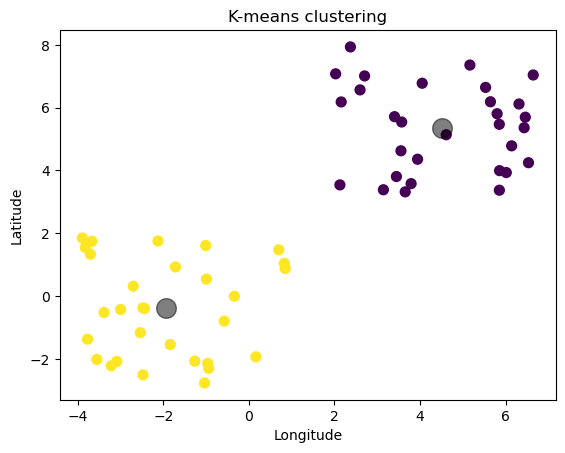

In [26]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)